In [2]:
#inf2178 assignment 1

#IMPORT packages
import pandas as pd
import xlrd
from scipy.stats import ttest_ind

#LOAD data
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/INF2178_A1_data.xlsx')

#print first rows of dataset to check what's in dataset
print(df.head())


Mounted at /content/drive
  OCCUPANCY_DATE         ORGANIZATION_NAME  PROGRAM_ID  \
0     2021-01-01  COSTI Immigrant Services       15371   
1     2021-01-01  COSTI Immigrant Services       16211   
2     2021-01-01  COSTI Immigrant Services       16192   
3     2021-01-01  COSTI Immigrant Services       16191   
4     2021-01-01  COSTI Immigrant Services       16193   

                                        PROGRAM_NAME       SECTOR  \
0       COSTI North York West Hotel - Family Program     Families   
1      COSTI North York West Hotel - Seniors Program  Mixed Adult   
2          COSTI North York West Hotel Program - Men          Men   
3  COSTI North York West Hotel Program - Mixed Adult  Mixed Adult   
4        COSTI North York West Hotel Program - Women        Women   

  PROGRAM_MODEL OVERNIGHT_SERVICE_TYPE       PROGRAM_AREA  SERVICE_USER_COUNT  \
0     Emergency    Motel/Hotel Shelter  COVID-19 Response                  74   
1     Emergency    Motel/Hotel Shelter  COVID-19

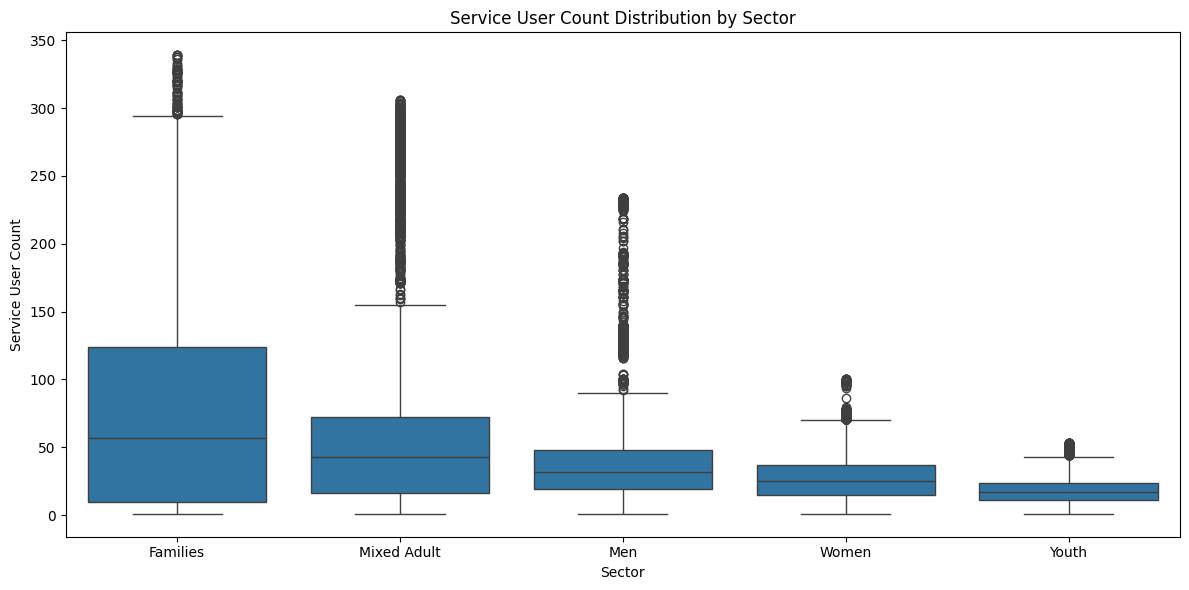

Median Service User Count by Sector:
SECTOR
Families       57.0
Men            32.0
Mixed Adult    43.0
Women          25.0
Youth          17.0
Name: SERVICE_USER_COUNT, dtype: float64

Mean Service User Count by Sector:
SECTOR
Families       79.651974
Men            39.869537
Mixed Adult    62.112985
Women          28.656189
Youth          19.536246
Name: SERVICE_USER_COUNT, dtype: float64


In [3]:
#EDA - exploratory data analysis

#BOXPLOT 1 - SECTOR vs SERVICE USER COUNT
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='SECTOR', y='SERVICE_USER_COUNT', data=df)
plt.xticks()
plt.title('Service User Count Distribution by Sector')
plt.ylabel('Service User Count')
plt.xlabel('Sector')
plt.tight_layout()
plt.show()

#summary stats
#MEDIAN service user count for each sector
median_service_user_count = df.groupby('SECTOR')['SERVICE_USER_COUNT'].median()
print("Median Service User Count by Sector:")
print(median_service_user_count)

#MEAN service user count for each sector
mean_service_user_count = df.groupby('SECTOR')['SERVICE_USER_COUNT'].mean()
print("\nMean Service User Count by Sector:")
print(mean_service_user_count)

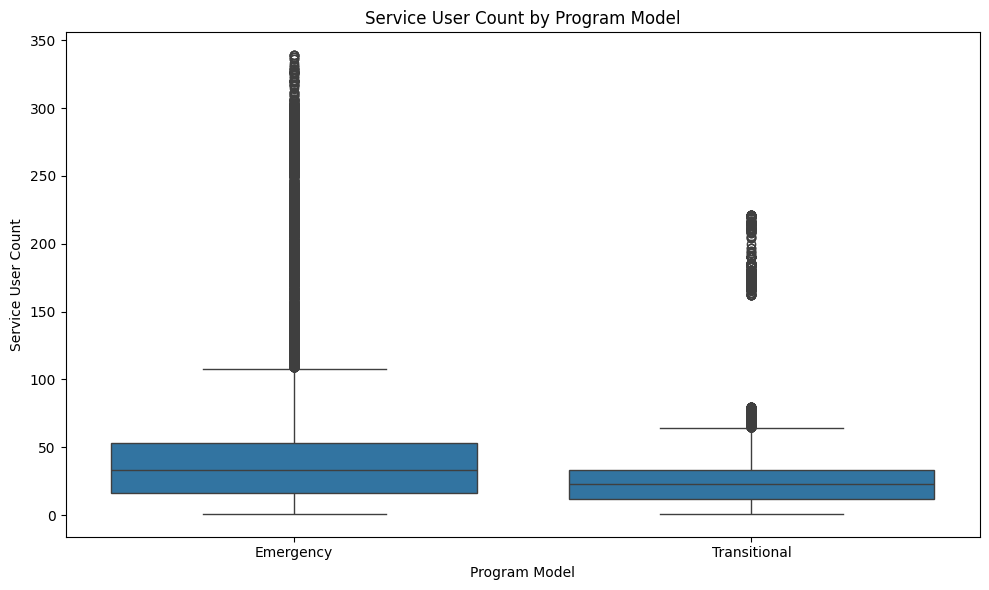

Median Service User Count by Program Model:
PROGRAM_MODEL
Emergency       33.0
Transitional    23.0
Name: SERVICE_USER_COUNT, dtype: float64

Mean Service User Count by Program Model:
PROGRAM_MODEL
Emergency       49.064226
Transitional    30.988725
Name: SERVICE_USER_COUNT, dtype: float64


In [4]:
#BOXPLOT 2 - Program Model by User Count
#subset for 'PROGRAM_MODEL' and 'SERVICE_USER_COUNT' to get rid off missing values
df_filtered = df.dropna(subset=['PROGRAM_MODEL', 'SERVICE_USER_COUNT'])

#box plot for 'SERVICE_USER_COUNT' by 'PROGRAM_MODEL'
plt.figure(figsize=(10, 6))
sns.boxplot(x='PROGRAM_MODEL', y='SERVICE_USER_COUNT', data=df_filtered)
plt.title('Service User Count by Program Model')
plt.ylabel('Service User Count')
plt.xlabel('Program Model')
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

#summary stats
#MEDIAN user count for each program model
median_users_program_model = df_filtered.groupby('PROGRAM_MODEL')['SERVICE_USER_COUNT'].median()
print("Median Service User Count by Program Model:")
print(median_users_program_model)

#MEAN user count per program model
mean_users_count_program_model = df_filtered.groupby('PROGRAM_MODEL')['SERVICE_USER_COUNT'].mean()
print("\nMean Service User Count by Program Model:")
print(mean_users_count_program_model)


<ipython-input-11-68dce64e4ee0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['UTILIZATION_RATE'] = df_cleaned['OCCUPIED_BEDS'] / df_cleaned['CAPACITY_ACTUAL_BED']


     OCCUPIED_BEDS  CAPACITY_ACTUAL_BED  UTILIZATION_RATE
5              6.0                  8.0          0.750000
10            22.0                 24.0          0.916667
11             8.0                 12.0          0.666667
21            10.0                 12.0          0.833333
25            11.0                 12.0          0.916667
..             ...                  ...               ...
177           61.0                 66.0          0.924242
178           51.0                 51.0          1.000000
179           31.0                 38.0          0.815789
180           53.0                 53.0          1.000000
181           66.0                 66.0          1.000000

[100 rows x 3 columns]


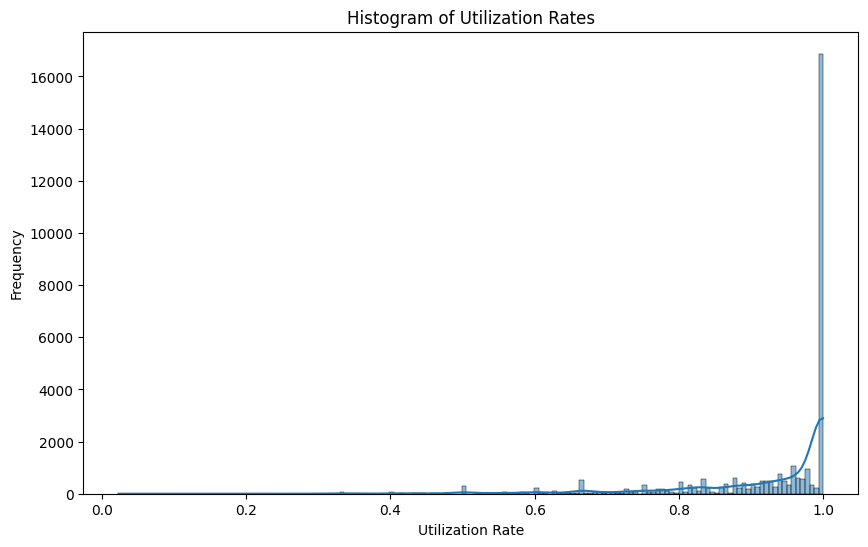

In [11]:
#HISTOGRAM - for Capacity Utilization
#capacity util = utilization rates for beds and rooms by dividing OCCUPIED_BEDS by CAPACITY_ACTUAL_BED and OCCUPIED_ROOMS by CAPACITY_ACTUAL_ROOM
# Calculate the utilization rates
df['UTILIZATION_RATE'] = df['OCCUPIED_BEDS'] / df['CAPACITY_ACTUAL_BED']

#TABLE - dsplay the first few rows of dataframe with new column
df_cleaned = df.dropna(subset=['OCCUPIED_BEDS', 'CAPACITY_ACTUAL_BED'])

#TABLE - calculate utilization rates on cleaned data
df_cleaned['UTILIZATION_RATE'] = df_cleaned['OCCUPIED_BEDS'] / df_cleaned['CAPACITY_ACTUAL_BED']

#TABLE - show the first few rows of the cleaned dataframe
print(df_cleaned[['OCCUPIED_BEDS', 'CAPACITY_ACTUAL_BED', 'UTILIZATION_RATE']].head(100))

#HIST - visuaize utilization rate
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['UTILIZATION_RATE'], kde=True)
plt.title('Histogram of Utilization Rates')
plt.xlabel('Utilization Rate')
plt.ylabel('Frequency')
plt.show()


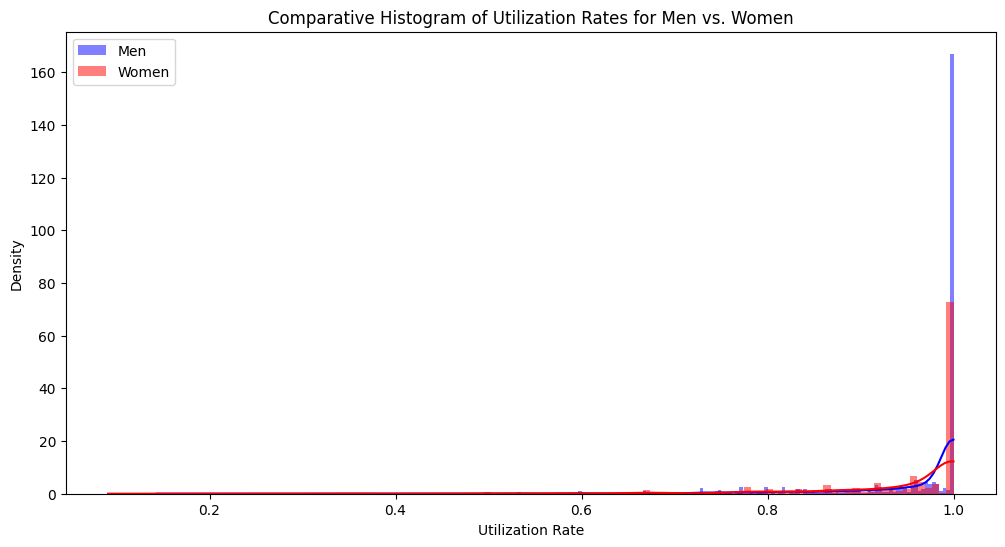

Men's Median:  1.0
Men's Mean:  0.960008309196296
Women's Median:  1.0
Women's Mean:  0.9392115108616235


In [12]:
#HISTOGRAM 2 - men vs women utilization rates just cause
#split cleaned data into men and women sectors
men_utilization = df_cleaned[df_cleaned['SECTOR'] == 'Men']['UTILIZATION_RATE']
women_utilization = df_cleaned[df_cleaned['SECTOR'] == 'Women']['UTILIZATION_RATE']

#plot itttt
plt.figure(figsize=(12, 6))
#HISTO for men
sns.histplot(men_utilization, kde=True, stat="density", linewidth=0, color="blue", alpha=0.5, label='Men')
#HISTO for women
sns.histplot(women_utilization, kde=True, stat="density", linewidth=0, color="red", alpha=0.5, label='Women')

plt.title('Comparative Histogram of Utilization Rates for Men vs. Women')
plt.xlabel('Utilization Rate')
plt.ylabel('Density')
plt.legend()
plt.show()

#summary statistics
#MEN Median and mean utilization rates
men_median = men_utilization.median()
men_mean = men_utilization.mean()
print("Men's Median: ", men_median)
print("Men's Mean: ", men_mean)

#WOMEN median and mean utilization rates
women_median = women_utilization.median()
women_mean = women_utilization.mean()
print("Women's Median: ", women_median)
print("Women's Mean: ", women_mean)

In [8]:
#Quantitative analysis - T-TESTs
#T-Test 1 - Emergency program usage vs Transitional usage - independent samples
from scipy.stats import ttest_ind

#subset data for Emergency and Transitional program models
#NOTE: filter out invalid variables with notna()
emergency_data = df[(df['PROGRAM_MODEL'] == 'Emergency') & df['SERVICE_USER_COUNT'].notna()]['SERVICE_USER_COUNT']
transitional_data = df[(df['PROGRAM_MODEL'] == 'Transitional') & df['SERVICE_USER_COUNT'].notna()]['SERVICE_USER_COUNT']

#T-TEST - welch's t-test
t_test_result = ttest_ind(emergency_data, transitional_data, equal_var=False)
print(t_test_result)

TtestResult(statistic=38.85174699254652, pvalue=0.0, df=20758.984667611778)


In [13]:
#Quantitative analysis - T-TESTs
#T-Test 2: Men vs Women in Utilization Rates, use T-test for independent samples

#separate into men and women groups based on sector
men_sector_utilization = df_cleaned[df_cleaned['SECTOR'] == 'Men']['UTILIZATION_RATE']
women_sector_utilization = df_cleaned[df_cleaned['SECTOR'] == 'Women']['UTILIZATION_RATE']

#Welch's t-test - assume no equal population variance
t_test_2 = ttest_ind(men_sector_utilization, women_sector_utilization, equal_var=False)
print(t_test_2)


TtestResult(statistic=12.917987255240035, pvalue=6.490999518169515e-38, df=11636.735625130883)


In [14]:
#T-TEST 3
#Small vs Large shelters based on Utilization rate - independent samples test

#split small and large shelters using median
median_capacity = df_cleaned['CAPACITY_ACTUAL_BED'].median()

#group shelters into small and large
small_shelters_utilization = df_cleaned[df_cleaned['CAPACITY_ACTUAL_BED'] <= median_capacity]['UTILIZATION_RATE']
large_shelters_utilization = df_cleaned[df_cleaned['CAPACITY_ACTUAL_BED'] > median_capacity]['UTILIZATION_RATE']

#Welch's t-test - assume no equal population variance
t_test_3 = ttest_ind(small_shelters_utilization, large_shelters_utilization, equal_var=False)
print(t_test_3)

TtestResult(statistic=-28.90912667576468, pvalue=2.2485863359693135e-181, df=31254.834672899768)
